# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [1]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [3]:
df = pd.read_csv("C:/Users/debas/Downloads/emails.csv")

## Describe the data and generate some basic insights unsing methods like .info

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


## Looking at the data

In [ ]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.

In [5]:
spam_df = df[df['spam'] == 1]
non_spam_df = df[df['spam'] == 0]


In [6]:
spam_word_freq = spam_df.iloc[:, 2:].sum().sort_values(ascending=False)

In [7]:
non_spam_word_freq = non_spam_df.iloc[:, 2:].sum().sort_values(ascending=False)


In [8]:
top_5_spam_words = spam_word_freq.head(5)
top_5_non_spam_words = non_spam_word_freq.head(5)

Text(0, 0.5, 'Frequency')

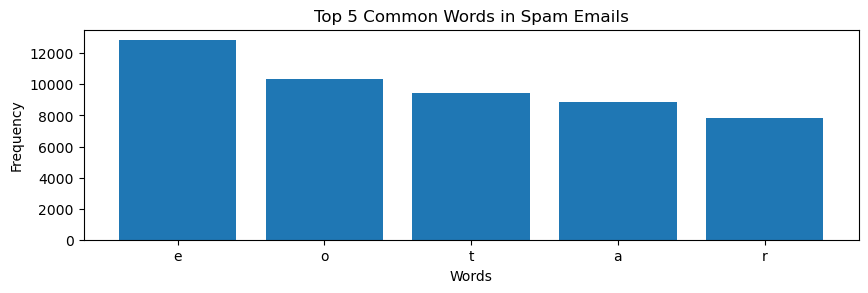

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(top_5_spam_words.index, top_5_spam_words.values)
plt.title('Top 5 Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

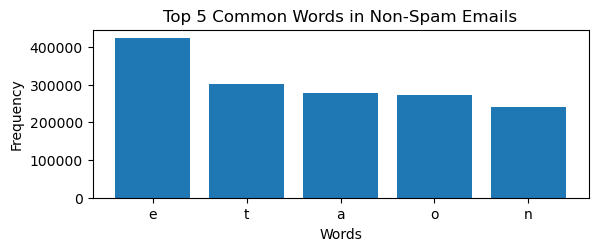

In [11]:
plt.subplot(2, 1, 2)
plt.bar(top_5_non_spam_words.index, top_5_non_spam_words.values)
plt.title('Top 5 Common Words in Non-Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')


In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Figuring out some comparatively more important features

In [ ]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
X = df.iloc[:, 2:]  # Exclude the first two columns (Email_no. and spam)
y = df['spam']

In [22]:
k = 1500  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)


In [23]:
X_selected_df = pd.DataFrame(X_selected, columns=[f'feature_{i+1}' for i in range(k)])


In [24]:
top_feature_indices = selector.get_support(indices=True)

In [25]:
top_features = X.columns[top_feature_indices]

In [26]:
df_selected = pd.concat([df[['Email No.', 'spam']], X_selected_df], axis=1)
df_selected.columns = ['Email No.', 'spam'] + top_features.tolist()

In [27]:
df_selected.to_csv('email_selected.csv', index=False)

## Train - Test Split

In [ ]:
# Create trianing and testing data

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.iloc[:, 2:]  # Exclude the first two columns (Email No. and spam)
y = df['spam']

# Split the data into training and testing sets
test_size = 0.2  # Percentage of the data to allocate for testing
random_state = 42  # Seed for random number generator for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Print the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training data shape: (4137, 3000)
Testing data shape: (1035, 3000)
Training target shape: (4137,)
Testing target shape: (1035,)


## Making Predictions using Multinomial NB Classifier

In [ ]:
# Feed the train data into multinomial naive bias classifier

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt


In [30]:
nb_classifier = MultinomialNB()


In [31]:
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [32]:
y_pred = nb_classifier.predict(X_test)


In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.961352657004831


In [34]:
y_prob = nb_classifier.predict_proba(X_test)[:, 1]


In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


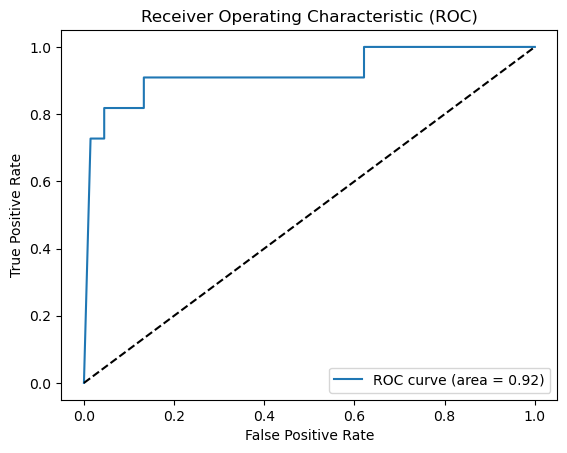

In [36]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Check the model's accuracy of test data and plot the ROC-AUC curve

## Plot the confusion Matrix

In [ ]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
selected_words = ['ability', 'chance', 'forwarded', 'delivery', 'product']
selected_df = df[['spam'] + selected_words]


In [39]:
y_true = y_test
y_pred = nb_classifier.predict(X_test)


In [40]:
cm = confusion_matrix(y_true, y_pred)


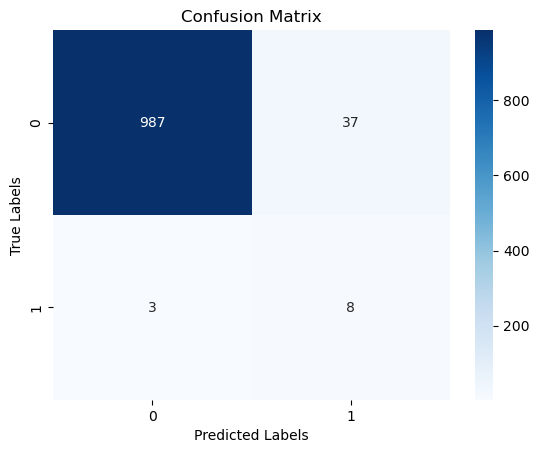

In [41]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Trying out with SVMs

In [ ]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix

Accuracy (SVC): 0.9893719806763285


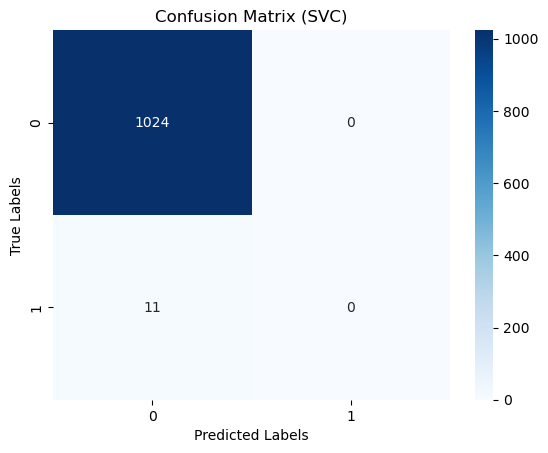

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVC classifier
svc_classifier = SVC()

# Fit the classifier on the training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy (SVC):", accuracy_svc)

# Create the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SVC)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Comparing the models

In [ ]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?

In [44]:
print("Accuracy (MNB):", accuracy)  # Accuracy of MNB classifier
print("Accuracy (SVC):", accuracy_svc)  # Accuracy of SVC classifier


Accuracy (MNB): 0.961352657004831
Accuracy (SVC): 0.9893719806763285


In [ ]:
SVC classifier is better than MNC classifier
1.  SVC are better equipped to capture non linear decision boundary compared to the linear assumptions of MNB.
2.  Better feature Space Separability of SVCs
3.  SVCs are more robust to outliers

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [45]:
import pandas as pd

# Define the string
s = "I am Debashree, an Economics undergraduate at IIT Kanpur"

# Convert the string to lowercase and split it into individual words
words = s.lower().split()

# Create a dictionary to store the word frequencies
word_freq = {}

# Count the frequency of each word
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Create a DataFrame from the word frequencies dictionary
df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])

# Print the DataFrame
print(df)


               Frequency
i                      1
am                     1
debashree,             1
an                     1
economics              1
undergraduate          1
at                     1
iit                    1
kanpur                 1
